In [4]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import boston_valuation as val
import matplotlib.pyplot as plt 
import seaborn as sn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [5]:
data = pd.read_csv('BostonHousing.csv')

data.count() #show us the number of rows 

crim       506
zn         506
indus      506
chas       506
nox        506
rm         506
age        506
dis        506
rad        506
tax        506
ptratio    506
b          506
lstat      506
medv       506
dtype: int64

In [6]:
data.rename(columns={'medv':'PRICE'}, inplace=True)

### Cleaning data - check for missing values

In [7]:
pd.isnull(data).any()
#provide us null values 

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
PRICE      False
dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


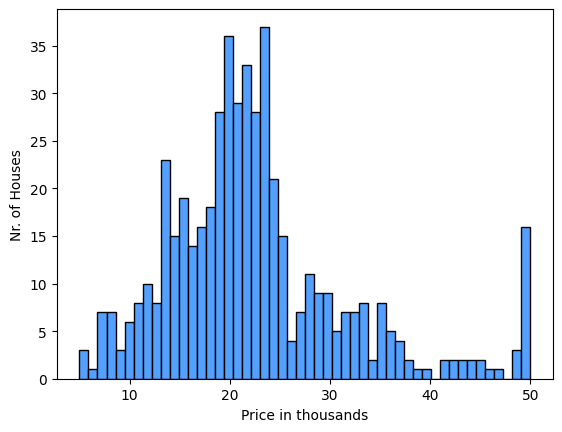

In [9]:
plt.Figure(figsize=[10,6])
plt.hist(data['PRICE'],bins=50 , ec = 'black', color = '#54a0ff') 

plt.xlabel('Price in thousands')
plt.ylabel('Nr. of Houses')

plt.show()

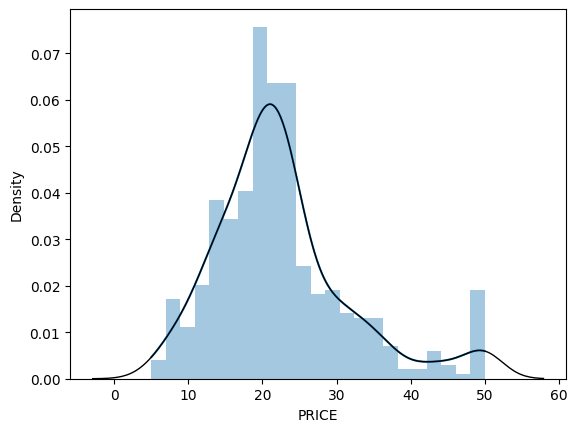

In [10]:
sn.histplot(data["PRICE"], kde=True, stat="density", linewidth=0, alpha=0.4)
sn.kdeplot(data["PRICE"], color='black', linewidth=1)
plt.style.use('fivethirtyeight')
plt.show()

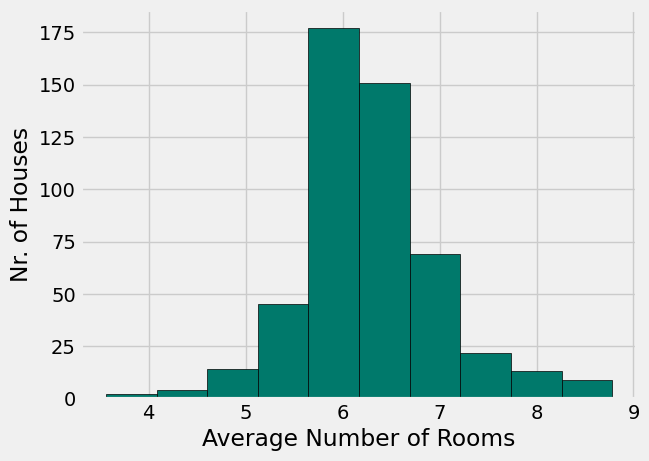

In [11]:
plt.Figure(figsize=[10,6])
plt.hist(data['rm'], ec = 'black', color = '#00796b') 

plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Houses')

plt.show()

In [12]:
data['rm'].mean()

np.float64(6.284634387351778)

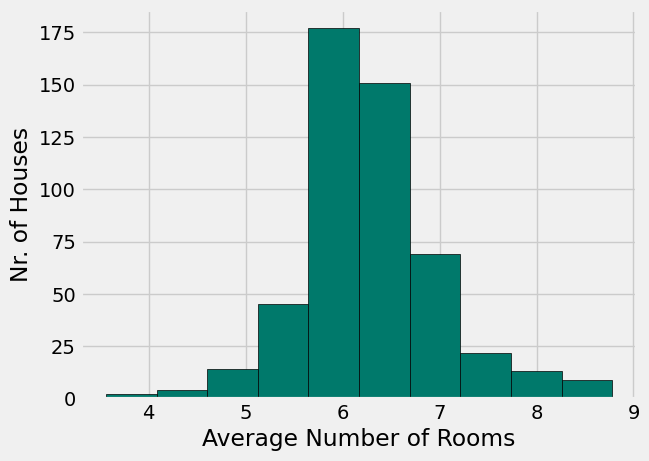

In [13]:
plt.Figure(figsize=[10,6])
plt.hist(data['rm'], ec = 'black', color = '#00796b') 

plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Houses')

plt.show()

In [14]:
plt.Figure(figsize=[10,6])
plt.hist(data['rad'],bins= 24, ec = 'black', color = '#6c5ce7',rwidth=0.7) 

plt.xlabel('Acessibility to highways')
plt.ylabel('Nr. of Houses')

plt.show()

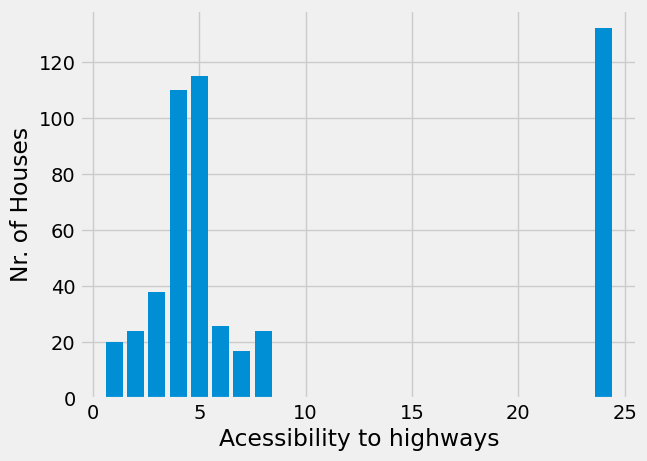

In [15]:
#observation
frq = data['rad'].value_counts()

#to access values 2 methods 
#frq.index or frq.axes[0]

plt.Figure(figsize=[10,6])

plt.xlabel('Acessibility to highways')
plt.ylabel('Nr. of Houses')

plt.bar(frq.index,height=frq)
plt.show()

In [16]:
#how many houses are in charles river
data['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

## Descriptive Statistics

In [17]:
data['PRICE'].min()
data['PRICE'].max()

np.float64(50.0)

In [18]:
data.min()

crim         0.00632
zn           0.00000
indus        0.46000
chas         0.00000
nox          0.38500
rm           3.56100
age          2.90000
dis          1.12960
rad          1.00000
tax        187.00000
ptratio     12.60000
b            0.32000
lstat        1.73000
PRICE        5.00000
dtype: float64

In [19]:
data.max()

crim        88.9762
zn         100.0000
indus       27.7400
chas         1.0000
nox          0.8710
rm           8.7800
age        100.0000
dis         12.1265
rad         24.0000
tax        711.0000
ptratio     22.0000
b          396.9000
lstat       37.9700
PRICE       50.0000
dtype: float64

In [20]:
# data.mean() provide us  mean value
#data.meadian() provides the middle value of each column

#data.discribe(): provide all values in mean, median, max and min

## Correlation
## $$ \rho_{x,y} = \mathrm{corr}(x, y) $$
## $$-1.0 \leq \rho_{x,y} \leq +1.0 $$

In [21]:
##coorelation between average number of rooms and Price
data['PRICE'].corr(data['rm'])

np.float64(0.6953599470715393)

In [22]:
data['PRICE'].corr(data['ptratio'])

np.float64(-0.5077866855375619)

In [23]:
#data coorelation of all data
data.corr()

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
lstat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              dis       rad       tax   ptratio         b     lstat     PRICE  
crim    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
zn       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
indus   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
chas    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
nox     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
rm       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
age     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
dis      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
b        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
lstat   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [24]:
#to show only useful info
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True #mask = truee it meeeans hide this cell
#if false means show this cell
mask


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [25]:
plt.Figure(figsize=(16,10))
sn.heatmap(data.corr(), mask=mask, annot=True,annot_kws={"size":  8})
#annt for showing valueese 
sn.set_style('white')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [26]:
#plotting using matplotlib
nox_dis_corr = round(data['nox'].corr(data['dis']), 4)

plt.figure(figsize=(9,6))
plt.style.use('seaborn-v0_8-darkgrid')
plt.scatter(data['dis'],data['nox'], color='blue')

plt.title(f"DS vs NX (Correlation {nox_dis_corr})", fontsize=14)
plt.xlabel('DS',fontsize=14)
plt.ylabel('Ntrogeen Oxide Amount',fontsize=14)

plt.show()

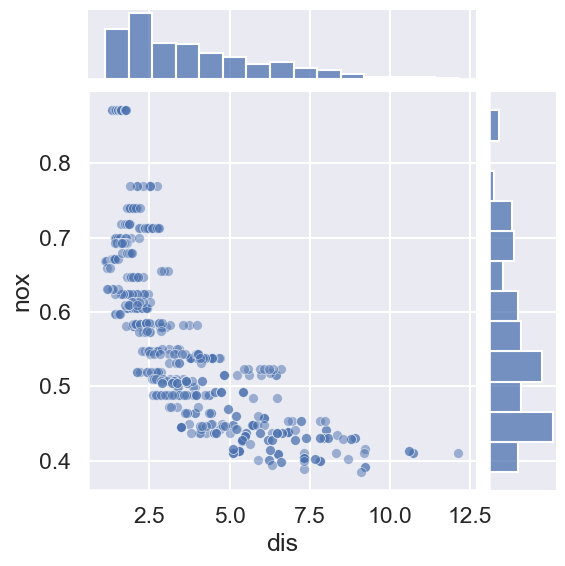

In [27]:
#plotting using seaborn
sn.set()
sn.set_context('talk')

sn.jointplot(x= data['dis'],y= data['nox'], kind='scatter', s=50, joint_kws={'alpha':0.5})
plt.show()

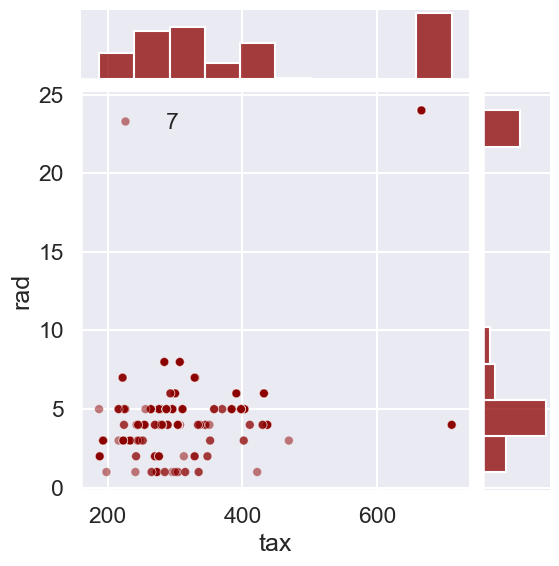

In [28]:
#plotting using seaborn
sn.set()
sn.set_context('talk')

sn.jointplot(x= data['tax'],y= data['rad'],size = 7, color='darkred', s=50, joint_kws={'alpha':0.5})
plt.show()

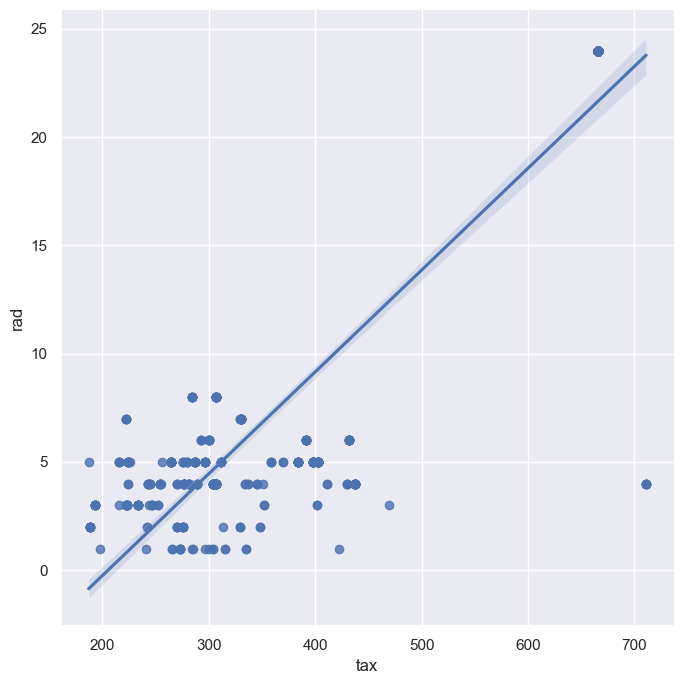

In [29]:
#to imppplement lineaer regression
sn.set()
sn.lmplot(x='tax',y='rad', data=data, height=7)
plt.show()

In [30]:
#plotting using matplotlib
rm_price_corr = round(data['rm'].corr(data['PRICE']), 4)

plt.figure(figsize=(9,6))
plt.style.use('seaborn-v0_8-darkgrid')
plt.scatter(data['rm'],data['PRICE'], color='skyblue')

plt.title(f"RM vs PRICE (Correlation {rm_price_corr})", fontsize=14)
plt.xlabel('RM - Median nr of rooms',fontsize=14)
plt.ylabel('PRICE - Propererty price iin 000s',fontsize=14)

plt.show()

In [31]:
%%time

sn.pairplot(data)
plt.show()

CPU times: total: 37.8 s
Wall time: 51.2 s


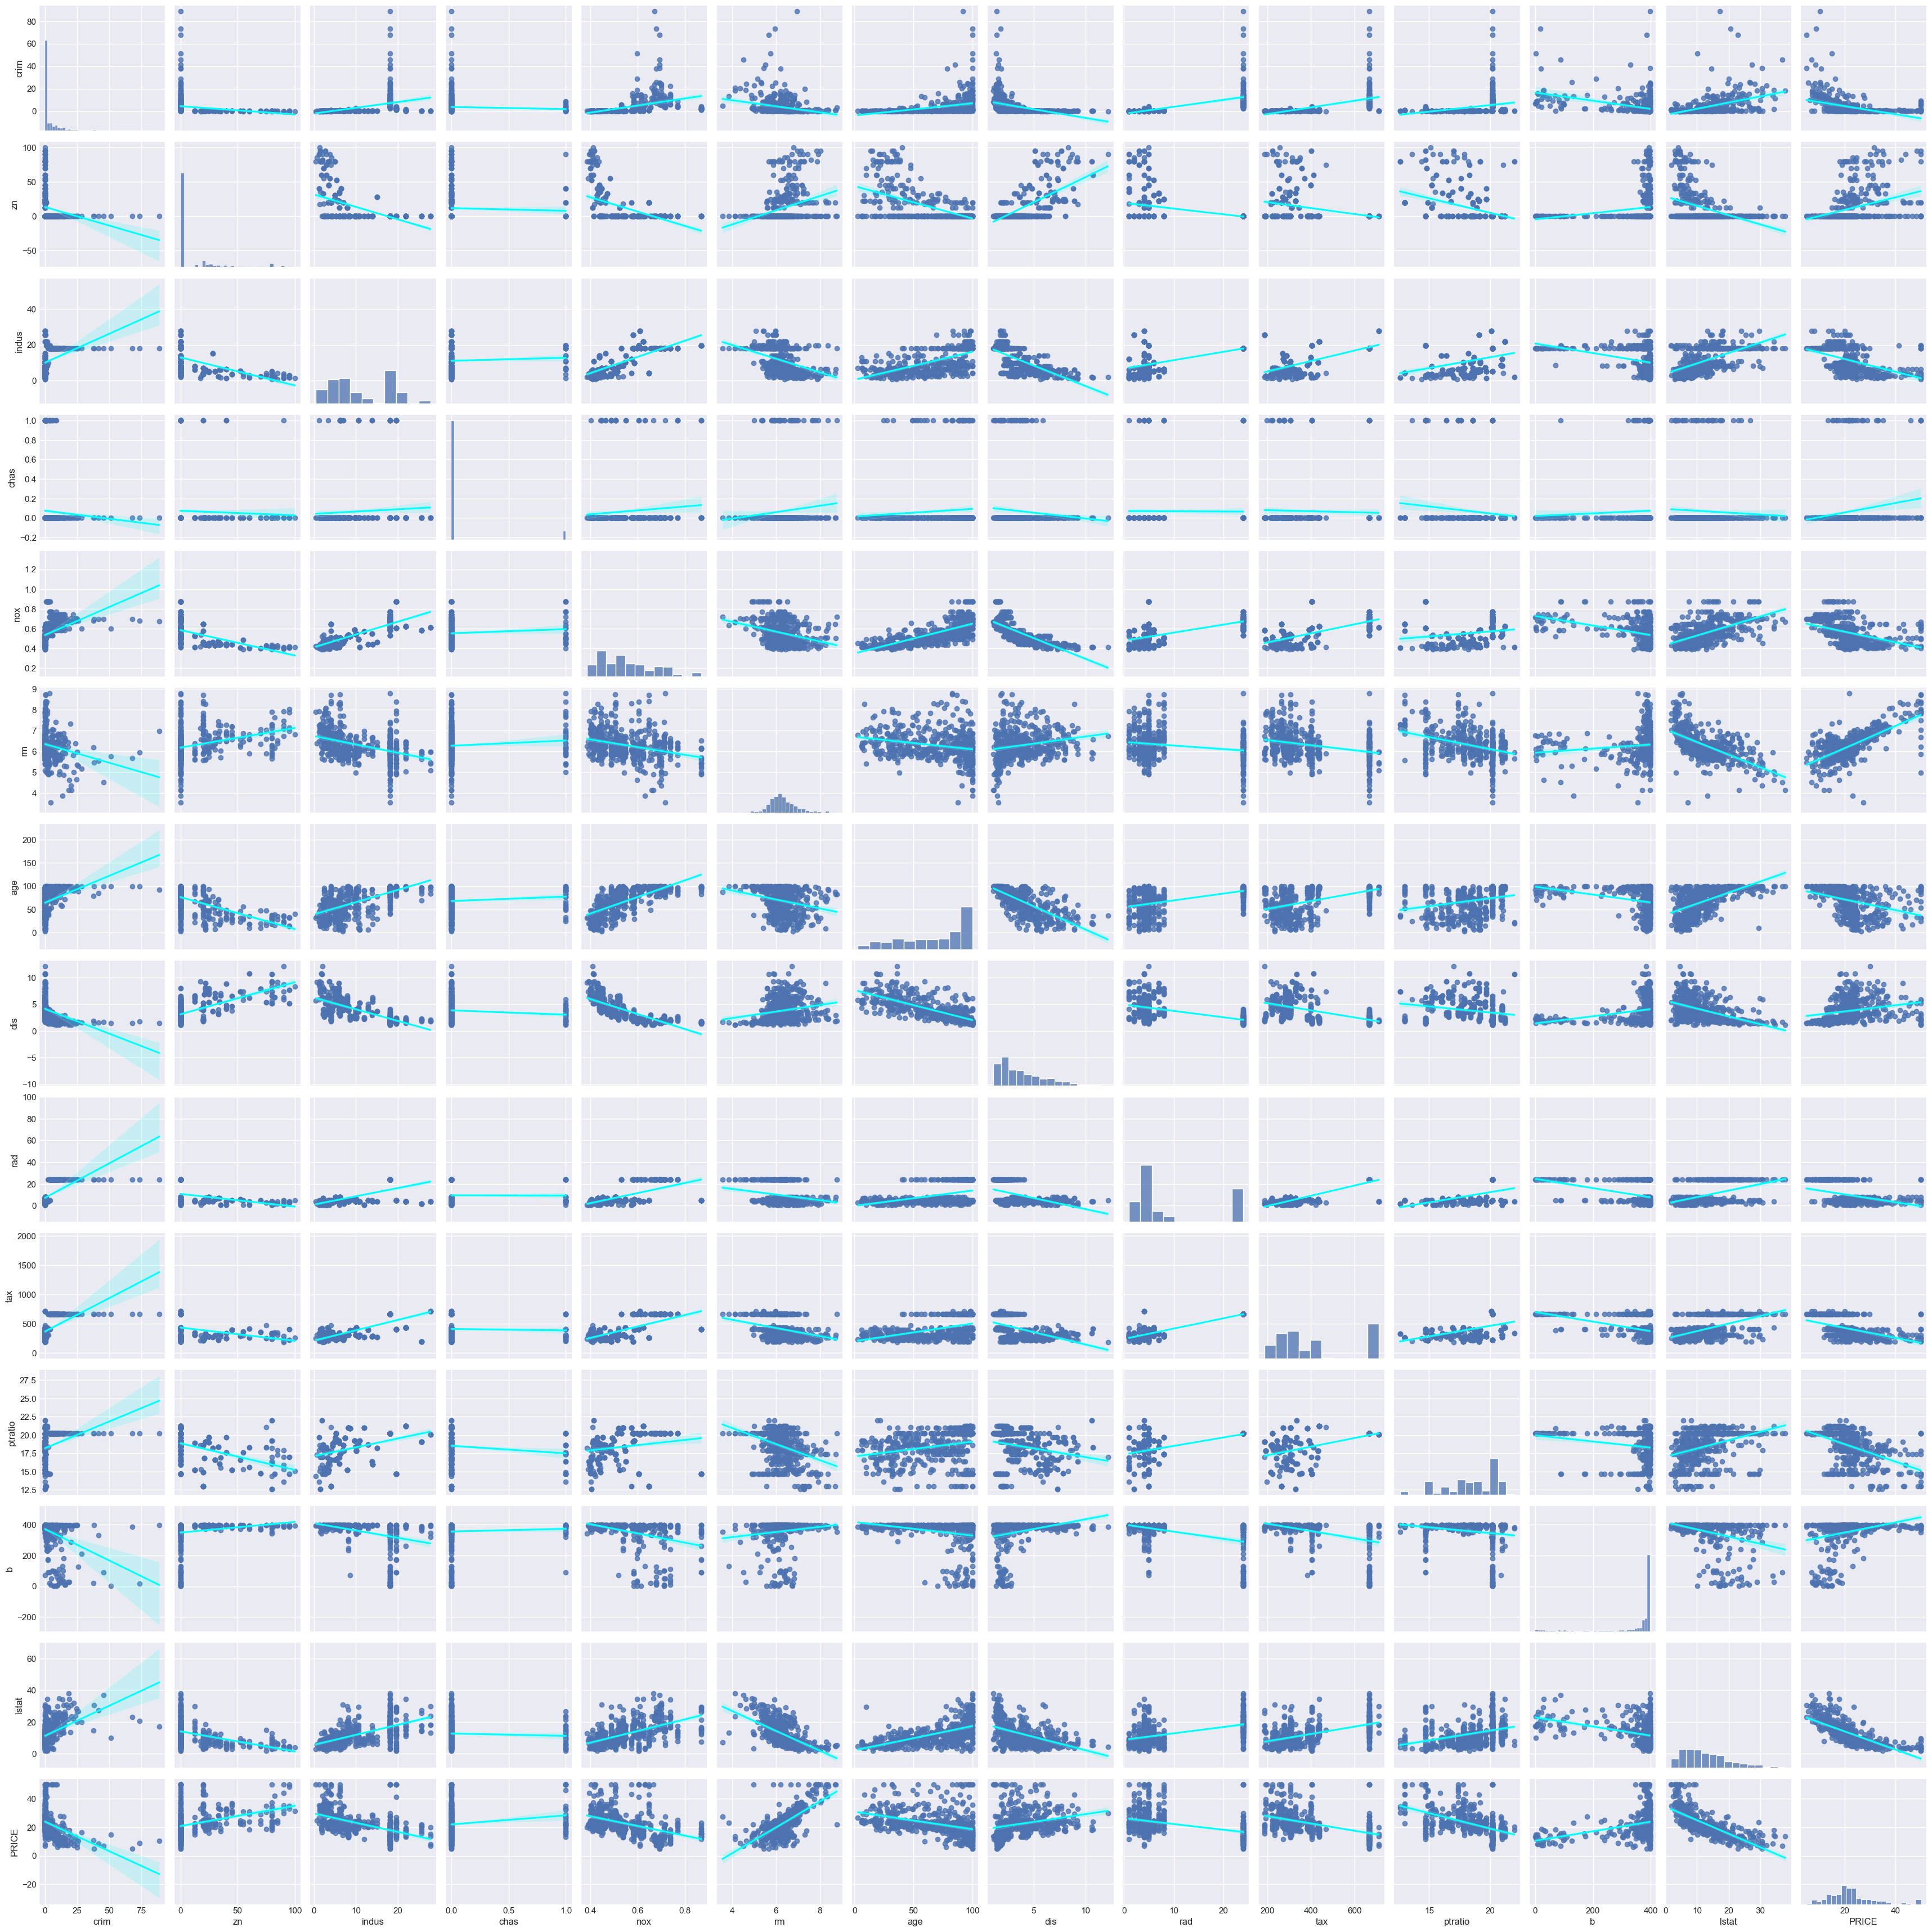

CPU times: total: 53.4 s
Wall time: 56.9 s


In [32]:
%%time
sn.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

### Training and Testing Dataset

In [33]:
prices  = data['PRICE']
features = data.drop('PRICE', axis=1 )

x_train,x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2 ,random_state=10 )

In [34]:
#len(x_train)/len(features)
regr = LinearRegression()
regr.fit(x_train,y_train)

print('Starting_point: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns , columns=["COEF_"])

Starting_point:  36.814936377835956


COEF_
crim     -0.126514
zn        0.032577
indus     0.041558
chas      4.604299
nox     -19.167755
rm        3.551635
age       0.005633
dis      -1.326235
rad       0.340059
tax      -0.012438
ptratio  -0.898040
b         0.009290
lstat    -0.551426

In [35]:
print('R-Square value of Test Dataset', regr.score(x_test,y_test))
print('R-Square value of train Dataset', regr.score(x_train,y_train))

R-Square value of Test Dataset 0.7814130112621427
R-Square value of train Dataset 0.7220464076700048


In [36]:
#Traansforming th data (positive skewweweew ko kam kne k liye)
y_lg = np.log(data['PRICE'])
y_lg


0      3.072693
1      3.546740
2      3.508556
3      3.589059
4      3.356897
         ...   
501    3.552487
502    3.493473
503    3.881564
504    3.912023
505    3.453157
Name: PRICE, Length: 506, dtype: float64

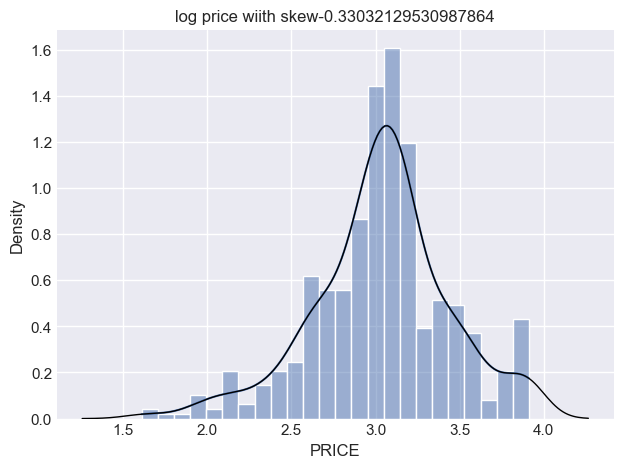

In [37]:
sn.histplot(y_lg, kde=True, stat='density', alpha=0.5)
sn.kdeplot(y_lg, color='black', linewidth=1)
plt.title(f"log price wiith skew{y_lg.skew()}")
plt.show()

In [38]:
sn.lmplot(x='lstat', y = 'PRICE', data=data,height = 7, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'} )
plt.show()

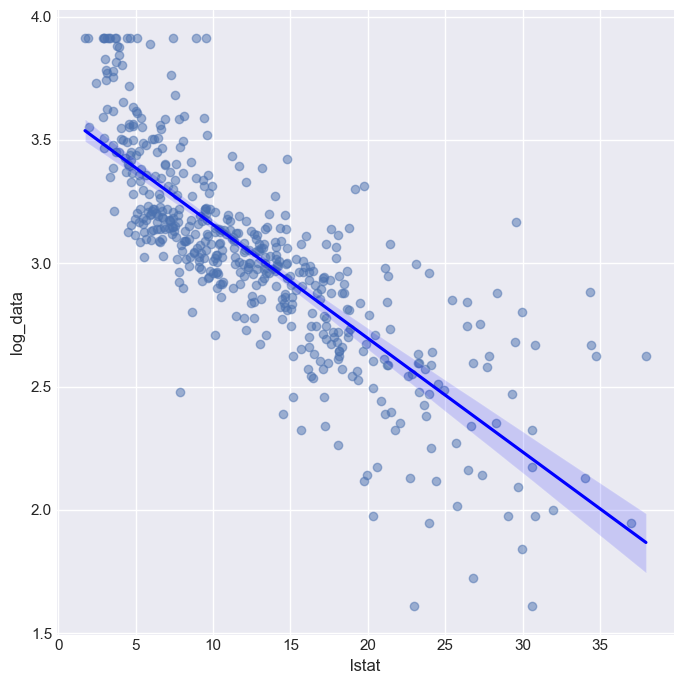

In [39]:
transdata = features
transdata['log_data'] = y_lg
sn.lmplot(x='lstat', y = 'log_data', data=transdata ,height = 7, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'} )
plt.show()

### Using Log values


In [40]:
prices  = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1 )

x_train,x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2 ,random_state=10 )

In [41]:
regr = LinearRegression()
regr.fit(x_train,y_train)

print('Starting_point: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns , columns=["COEF_"])

Starting_point:  4.222075938184899


COEF_
crim    -0.010219
zn       0.000926
indus    0.003149
chas     0.145882
nox     -0.849122
rm       0.078744
age      0.000372
dis     -0.046673
rad      0.015515
tax     -0.000684
ptratio -0.038437
b        0.000381
lstat   -0.029933

In [42]:
#charles Property Prermum
#to reverse the log 
np.e**0.14 

1.1502737988572274

##  p-values and evalating

In [43]:
x_cnstant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_cnstant)
results = model.fit()

#results.params
#results.pvaluees

pd.DataFrame({'Coef':results.params, 'pvalues': round(results.pvalues, 3)})

Coef  pvalues
const    4.222076    0.000
crim    -0.010219    0.000
zn       0.000926    0.148
indus    0.003149    0.262
chas     0.145882    0.001
nox     -0.849122    0.000
rm       0.078744    0.000
age      0.000372    0.539
dis     -0.046673    0.000
rad      0.015515    0.000
tax     -0.000684    0.000
ptratio -0.038437    0.000
b        0.000381    0.004
lstat   -0.029933    0.000

## Testing for Multicolinearity
$$ TAX= \alpha _0 + \alpha _1 RM + \alpha _2 NoX + ....+ \alpha _{12}LSTAT $$

$$ VIP {TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [44]:
variance_inflation_factor(x_cnstant.values, 1)

vif=[ variance_inflation_factor(x_cnstant.values, i) for i in range(len(x_cnstant.columns))]
pd.DataFrame({'coef_name':x_cnstant.columns, 'vif':np.around(vif, 2)})


coef_name     vif
0      const  577.34
1       crim    1.75
2         zn    2.43
3      indus    3.98
4       chas    1.09
5        nox    4.49
6         rm    1.87
7        age    3.17
8        dis    4.10
9        rad    6.73
10       tax    8.05
11   ptratio    1.77
12         b    1.32
13     lstat    2.82

## Model Simplificatioin

In [45]:
#original model with log prices and all features
x_cnstant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_cnstant)
results = model.fit()

org_coef=pd.DataFrame({'Coef':results.params, 'pvalues': round(results.pvalues, 3)})
print('BIC: ',results.bic)
print('R-Squarered ',results.rsquared)

BIC:  -104.09038482039104
R-Squarered  0.7768745440549064


In [46]:
#removeeing indus from the Dataframe
x_cnstant = sm.add_constant(x_train)
x_cnstant = x_cnstant.drop(['indus','age'] ,axis = 1)

model = sm.OLS(y_train, x_cnstant)
results = model.fit()

reduced_coef=pd.DataFrame({'Coef':results.params, 'pvalues': round(results.pvalues, 3)})
print('BIC: ',results.bic)
print('R-Squarered ',results.rsquared)

BIC:  -114.43450745966763
R-Squarered  0.7759565723127038


## Residual and residual plots

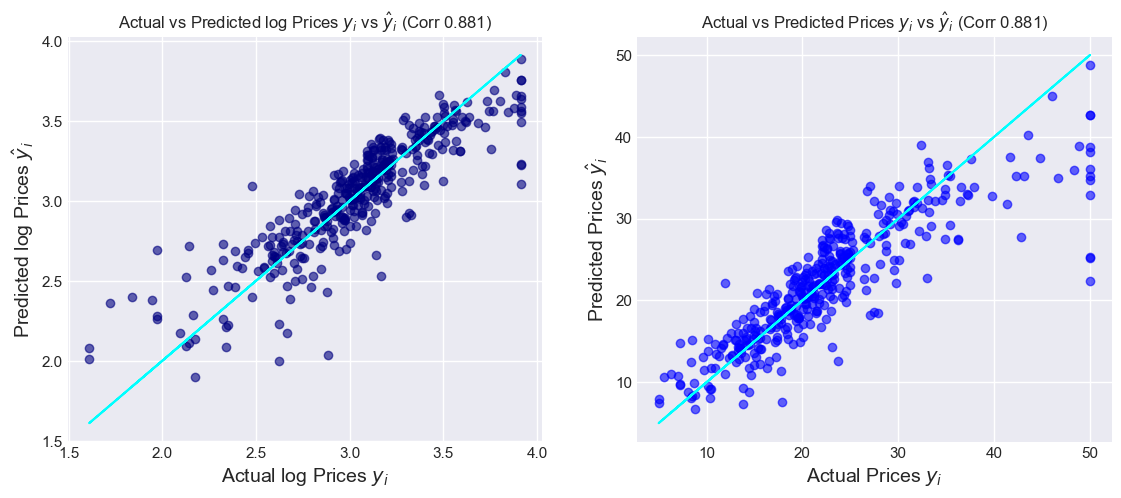

In [47]:
#Modified code: Transformed (using log prices) and Simplified (dropping 2 features)
prices  = np.log(data['PRICE'])
features = data.drop(['PRICE','indus', 'age'] , axis=1 )

x_train,x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2 ,random_state=10 )

#using Statsmodel
x_cnstant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_cnstant)
results = model.fit()

#residuals
#residuals = y_train - results.fittedvalues
#results.resid

#graph of actual vs predicted values (To check Prediction Quality)
plt.figure(figsize=(12, 5))
corr = round( y_train.corr(results.fittedvalues), 3)
plt.subplot(1,2,1)
plt.scatter(y_train, results.fittedvalues, color='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.title(f'Actual vs Predicted log Prices $y _i $ vs $\\hat y _i$ (Corr {corr})')
plt.xlabel('Actual log Prices $y _i$', fontsize=14)
plt.ylabel('Predicted log Prices $\\hat y _i$', fontsize=14)

plt.subplot(1,2,2)
plt.scatter(np.e**y_train, np.e**results.fittedvalues, color='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.title(f'Actual vs Predicted Prices $y _i $ vs $\\hat y _i$ (Corr {corr})')
plt.xlabel('Actual Prices $y _i$', fontsize=14)
plt.ylabel('Predicted Prices $\\hat y _i$', fontsize=14)
plt.show()

#Mean Square error and r-Suared values
reslts_log_mse = round(results.mse_resid, 3)
reslts_log_rsquared = round(results.rsquared, 3)


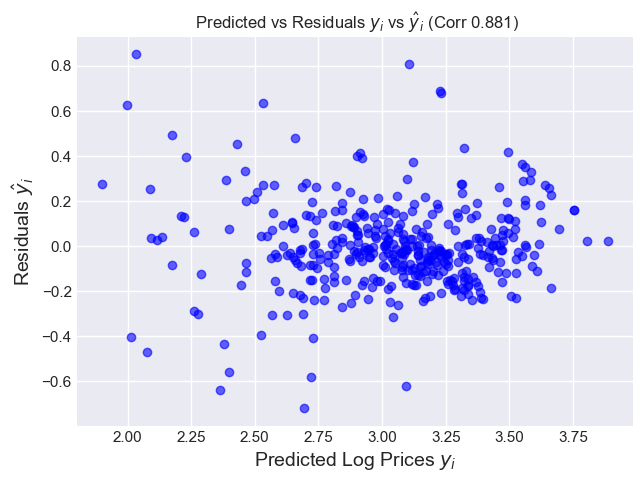

In [48]:
#To diagnose the model Error
plt.scatter(results.fittedvalues, results.resid, color='blue', alpha=0.6)

plt.title(f' Predicted vs Residuals $y _i $ vs $\\hat y _i$ (Corr {corr})')
plt.xlabel('Predicted Log Prices $y _i$', fontsize=14)
plt.ylabel('Residuals $\\hat y _i$', fontsize=14)
plt.show()

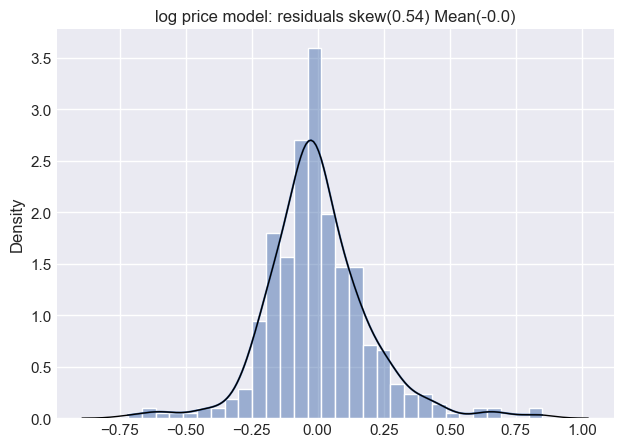

In [49]:
#Distribution of residuals (Log Prices) - check for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sn.histplot(results.resid, kde=True, stat='density', alpha=0.5)
sn.kdeplot(results.resid, color='black', linewidth=1)
plt.title(f"log price model: residuals skew({resid_skew}) Mean({resid_mean})")
plt.show()

In [50]:
#Original Model and All features
prices  = (data['PRICE'])
features = data.drop(['PRICE'] , axis=1 )

x_train,x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2 ,random_state=10 )

#using Statsmodel
x_cnstant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_cnstant)
results = model.fit()


#Actual vs Predicted values
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_train, results.fittedvalues, color='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.title(f'Actual vs Predicted Prices $y _i $ vs $\\hat y _i$ (Corr {corr})')
plt.xlabel('Actual Prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted Prices 000s $\\hat y _i$', fontsize=14)

plt.subplot(1,2,2)
plt.scatter(results.fittedvalues,results.resid, color='Indigo', alpha=0.6)

plt.title(f' Predicted Prices vs Residuals $y _i $ vs $\\hat y _i$ (Corr {corr})')
plt.xlabel('Predicted Log Prices $y _i$', fontsize=14)
plt.ylabel('Residuals $\\hat y _i$', fontsize=14)
plt.show()

#Full values
full_mse = round(results.mse_resid, 3)
full_rsquared = round(results.rsquared, 3)

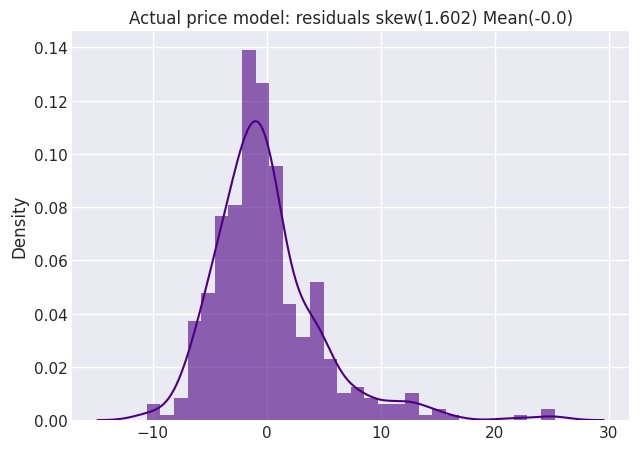

In [51]:
#Normality check for Actual VAlues
resid_mean1 = round(results.resid.mean(), 3)
resid_skew2 = round(results.resid.skew(), 3)

sn.histplot(results.resid, color='indigo', alpha=0.6, stat = 'density',linewidth=0)
sn.kdeplot(results.resid, color='indigo', linewidth=1.5)

plt.title(f"Actual price model: residuals skew({resid_skew2}) Mean({resid_mean1})")
plt.style.use('classic')
plt.show()


In [52]:
#Oomitted values
prices  = np.log(data['PRICE'])
features = data.drop(['PRICE','indus', 'age','lstat','rm','nox','crim'] , axis=1 )

x_train,x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2 ,random_state=10 )

#using Statsmodel
x_cnstant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_cnstant)
results = model.fit()

#residuals
#residuals = y_train - results.fittedvalues
#results.resid

#graph of actual vs predicted values (To check Prediction Quality)
plt.figure(figsize=(12, 5))
corr = round( y_train.corr(results.fittedvalues), 3)
plt.subplot(1,2,1)
plt.scatter(y_train, results.fittedvalues, color='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.title(f'Actual vs Predicted log Prices $y _i $ vs $\\hat y _i$ (Corr {corr})')
plt.xlabel('Actual log Prices $y _i$', fontsize=14)
plt.ylabel('Predicted log Prices $\\hat y _i$', fontsize=14)

plt.subplot(1,2,2)
plt.scatter(np.e**y_train, np.e**results.fittedvalues, color='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.title(f'Actual vs Predicted Prices $y _i $ vs $\\hat y _i$ (Corr {corr})')
plt.xlabel('Actual Prices $y _i$', fontsize=14)
plt.ylabel('Predicted Prices $\\hat y _i$', fontsize=14)
plt.show()

#Mean Square error and r-Suared values
omit_log_mse = round(results.mse_resid, 3)
omit_log_rsquared = round(results.rsquared, 3)


In [53]:
pd.DataFrame({'R-Squared': [reslts_log_rsquared, full_rsquared,omit_log_rsquared],
            'MSE':[reslts_log_mse, full_mse, omit_log_mse],
            'RMSE':np.sqrt([reslts_log_mse, full_mse, omit_log_mse])}, 
            index=['Reduced Log Model', 'Full Normal price model ' , 'omit Log Model'])

R-Squared     MSE      RMSE
Reduced Log Model             0.776   0.038  0.194936
Full Normal price model       0.722  23.556  4.853452
omit Log Model                0.451   0.092  0.303315

In [54]:
#95% prediction lies between -2sigma to 2
# and 68% PRECENTAGE LIES BETWEEN   -1SIGMA TO 1

#Now we are going to predict the upper and lower bound for 95%
upper_bound = np.log(30) + 2*np.sqrt(reslts_log_mse)
print('The upper bound in log prices is: ', upper_bound)  
print('The upper bound in Actual prices is: ', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reslts_log_mse)
print('The lower bound in log prices is: ', lower_bound)  
print('The lower bound in Actual prices is: ', np.e**lower_bound * 1000)

The upper bound in log prices is:  3.791069155454514
The upper bound in Actual prices is:  44303.74255135183
The lower bound in log prices is:  3.011325607869797
The lower bound in Actual prices is:  20314.310894995448


In [55]:
val.get_dollar_estimate(2,60,False)

The estimated property value is 81000.0.
At 95% confidence the valuation range is
USD 56000.0 at the lower end to USD 118000.0 at the high end.


c:\Users\umais\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
